\newpage

In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

from patsy import dmatrices, dmatrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import statsmodels.api as sm

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis

from fancyimpute import SoftImpute
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import rand_score
from ucimlrepo import fetch_ucirepo 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

\newpage

# Question 1: Classification Problem Identification

We will be analyzing the [Chronic Kidney Disease Dataset](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease).

We will first define and describe a classification problem based on the dataset. The classification problem is if we can use the data to predict whether a patient has chronic kidney disease.

\newpage

# Question 2: Variable Transformation

We will check to see if any variable transformation is needed in the dataset.



In [166]:
from ucimlrepo import fetch_ucirepo 
  
chronic_kidney_disease = fetch_ucirepo(id=336)

X = chronic_kidney_disease.data.features
y = chronic_kidney_disease.data.targets

numeric_features = [col for col, dtype in zip(X.columns, X.dtypes) if dtype in ['int64', 'float64']]
categorical_features = [col for col in X.columns if col not in numeric_features]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

accuracy = pipeline.score(X_test, y_test)
print("Model training complete.")
print("Model accuracy on test set: {:.2f}%".format(accuracy * 100))


Model training complete.
Model accuracy on test set: 97.50%


c:\Users\jorda\anaconda3\envs\proj02\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [167]:
y = y.copy()
y['class'] = pd.Categorical(
    y['class'], 
    categories=["ckd", "notckd"], 
    ordered=True
    )
y['class'] = y['class'].cat.codes

\newpage

# Question 3: Data Overview

We perform an initial exploration of the dataset.

We use the following representation to collect the dataset:

			age		-	age
			bp		-	blood pressure
			sg		-	specific gravity
			al		-   	albumin
			su		-	sugar
			rbc		-	red blood cells
			pc		-	pus cell
			pcc		-	pus cell clumps
			ba		-	bacteria
			bgr		-	blood glucose random
			bu		-	blood urea
			sc		-	serum creatinine
			sod		-	sodium
			pot		-	potassium
			hemo		-	hemoglobin
			pcv		-	packed cell volume
			wc		-	white blood cell count
			rc		-	red blood cell count
			htn		-	hypertension
			dm		-	diabetes mellitus
			cad		-	coronary artery disease
			appet		-	appetite
			pe		-	pedal edema
			ane		-	anemia
			class		-	class

In [168]:
for column in X.columns:
    unique_count = X[column].nunique()
    print(f"{column} has {unique_count} unique values")

age has 76 unique values
bp has 10 unique values
sg has 5 unique values
al has 6 unique values
su has 6 unique values
rbc has 2 unique values
pc has 2 unique values
pcc has 2 unique values
ba has 2 unique values
bgr has 146 unique values
bu has 118 unique values
sc has 84 unique values
sod has 34 unique values
pot has 40 unique values
hemo has 115 unique values
pcv has 42 unique values
wbcc has 89 unique values
rbcc has 45 unique values
htn has 2 unique values
dm has 3 unique values
cad has 2 unique values
appet has 2 unique values
pe has 2 unique values
ane has 2 unique values


In [169]:
X['dm'].unique()

array(['yes', 'no', '\tno', nan], dtype=object)

In [170]:
y['class'].nunique()

3

In [171]:
y['class'].unique()

array([ 0, -1,  1], dtype=int8)

In [172]:
X.shape

(400, 24)

In [173]:
X.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
dtype: object

In [174]:
#summary
columns_to_convert = ['sg', 'al', 'su', 'rbc', 'pc','pcc','ba','htn','dm','cad','appet','pe','ane']
for col in columns_to_convert:
    X[col] = pd.Categorical(X[col])
X.describe()

C:\Users\jorda\AppData\Local\Temp\ipykernel_8404\4167409110.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = pd.Categorical(X[col])
C:\Users\jorda\AppData\Local\Temp\ipykernel_8404\4167409110.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = pd.Categorical(X[col])
C:\Users\jorda\AppData\Local\Temp\ipykernel_8404\4167409110.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [175]:
#summary
for col in columns_to_convert:
    print(X[col].value_counts(normalize=True))

sg
1.020    0.300283
1.010    0.237960
1.025    0.229462
1.015    0.212465
1.005    0.019830
Name: proportion, dtype: float64
al
0.0    0.562147
1.0    0.124294
2.0    0.121469
3.0    0.121469
4.0    0.067797
5.0    0.002825
Name: proportion, dtype: float64
su
0.0    0.826211
2.0    0.051282
3.0    0.039886
1.0    0.037037
4.0    0.037037
5.0    0.008547
Name: proportion, dtype: float64
rbc
normal      0.810484
abnormal    0.189516
Name: proportion, dtype: float64
pc
normal      0.773134
abnormal    0.226866
Name: proportion, dtype: float64
pcc
notpresent    0.893939
present       0.106061
Name: proportion, dtype: float64
ba
notpresent    0.944444
present       0.055556
Name: proportion, dtype: float64
htn
no     0.630653
yes    0.369347
Name: proportion, dtype: float64
dm
no      0.653266
yes     0.344221
\tno    0.002513
Name: proportion, dtype: float64
cad
no     0.914573
yes    0.085427
Name: proportion, dtype: float64
appet
good    0.794486
poor    0.205514
Name: proportion, dtype

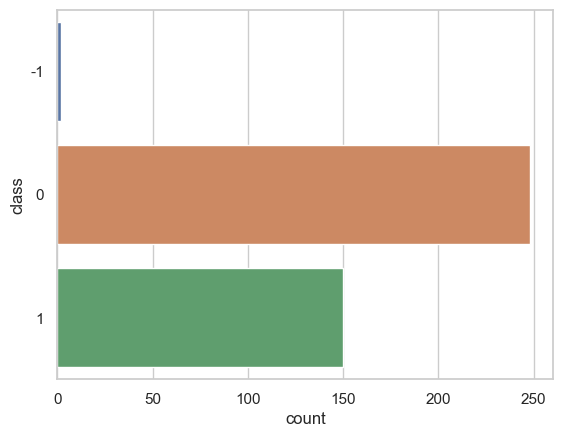

In [176]:
sns.countplot(y='class', data=y)
plt.show()

We see that the average patient in the dataset is 51 and with an average of 76 bp. Most patients are apart of class 0 (they have chronic kidney disease). The dataset contains numerical and categorical variables.

\newpage

# Question 4: Association Between Variables

We will analyze variable relationships and their implications for feature selection or extraction.

In [178]:
df = pd.concat([X, y], axis=1)

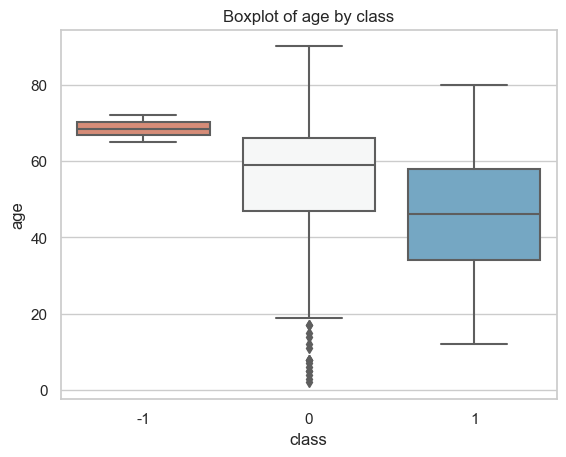

In [179]:
sns.set(style="whitegrid")
sns.boxplot(
    x='class', 
    y='age', 
    data=df, 
    palette='RdBu'
    )
plt.xlabel('class')
plt.ylabel('age')
plt.title('Boxplot of age by class') 
plt.show()

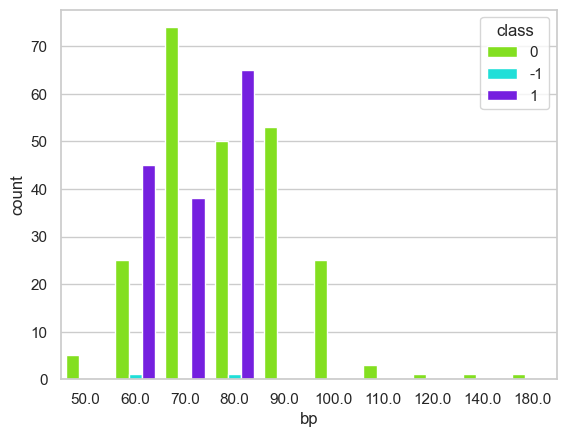

In [183]:
df['class'] = df['class'].astype(str)
class_color = sns.color_palette(
    'hsv', 
    len(df['class'].unique())
    )
plt.show()
sns.countplot(
    data=df, 
    x='bp', 
    hue='class',
    palette=class_color
    )

plt.show()


The dataset has 24 features and a target variable called "class." It categorizes individuals into "ckd" or "notckd." There are 400 cases, with 250 labeled as 'ckd' and 150 as 'notckd.' This class imbalance may require adjustments in training algorithms.

We see that on average, the older the patient the more likely they have ckd. Also, we see that patients who have blood pressure between 60 and 80 do not have chronic kidney disease. The patients with chronic kidney disease are right skewed on blood pressure.

\newpage

# Question 5: Missing Value Analysis and Handling

We will now remove the missing values in the dataset.

In [187]:
print(X.isnull().sum())


age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64


In [188]:
X = X.dropna()

In [189]:
print(X.isnull().sum())


age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64


\newpage

# Question 6: Outlier Analysis

\newpage

# Question 7: Sub-group Analysis


In [193]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (158, 24)
Shape of y: (400, 1)


In [194]:
y = y[:158]

In [195]:
print("Updated shape of X:", X.shape)
print("Updated shape of y:", y.shape)

Updated shape of X: (158, 24)
Updated shape of y: (158, 1)


\newpage

# Question 8: Data Splitting


In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


\newpage

# Question 9: Classifier Choice

We will use random forest  and logistic regression classifers. Random forest and logistic regression works well with the categorical and numerical features of the dataset.

\newpage

# Question 10: Performance Metrics

We will use accuracy and AUC-ROC to compare the performance of the classifiers. Accuracy represents the proportion of accurately predicted observations relative to the total number of observations. A higher accuracy indicates better overall performance. A greater AUC-ROC value (closer to 1) signifies an enhanced capability of the classifier to accurately classify instances, particularly in situations involving imbalanced classes.




\newpage

# Question 11: Feature Selection/Extraction


In [199]:
pca_X = PCA()
pca_X.fit(X)
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6], pca_X.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4,5,6], np.cumsum(pca_X.explained_variance_ratio_), '-s', label='Cumulative')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6])
plt.legend(loc=2)

ValueError: could not convert string to float: 'normal'

\newpage

# Question 12: Classifier Comparison

\newpage

# Question 13: Interpretable Classifier Insight


\newpage

# Question 15: Team Contribution
\newpage

# Question 16: Link
https://github.com/jordanchen00/jc_at_mac/blob/main/assignment6_stats3da3_jordanchen.ipynb